In [4]:
%load_ext autoreload
%autoreload 2
import spacy
import scispacy
from scispacy.linking import EntityLinker
import en_core_sci_lg
from scify.nlp import *
from scify.utils.GNBR_preprocessing import get_data_and_distributions
#from spacy.language import Language


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
text = "Spinal and bulbar muscular atrophy (SBMA) is an inherited motor neuron disease caused by the expansion of a polyglutamine tract within the androgen receptor (AR). SBMA can be caused by this easily."

In [7]:
from scispacy.abbreviation import AbbreviationDetector
from spacy.pipeline import merge_entities
from scispacy.linking import EntityLinker

nlp = spacy.load("en_core_sci_lg")
abbreviation_pipe = AbbreviationDetector(nlp)

nlp.add_pipe(abbreviation_pipe)
nlp.add_pipe(merge_entities)
#nlp.add_pipe(linker_umls)

In [109]:
#linker_umls = EntityLinker(resolve_abbreviations=True, name="umls")
nlp.add_pipe(linker_umls)

ValueError: [E007] 'EntityLinker' already exists in pipeline. Existing names: ['tagger', 'parser', 'ner', 'AbbreviationDetector', 'merge_entities', 'EntityLinker']

In [10]:
from textacy.corpus import Corpus

corp = Corpus(nlp).load(nlp, "../data/experiments/pubmed_20n1015_annotated_756")

#https://github.com/explosion/spaCy/issues/860
#Doc.set_extension("annotated", default=None)
#doc = nlp(text)

In [19]:
doc = corp[12]
sent = [* doc.sents][3]
sent

Real-time polymerase chain reaction (RT-PCR) was used to study the effects of BPs at a dose of 10-9 M on the expression of FGF, CTGF, TGF-β1, TGFβR1, TGFβR2, TGFβR3, DDR2, α-actin, fibronectin, decorin, and elastin.

In [101]:
build_hierplane_tree(sent)

{'text': 'Real-time polymerase chain reaction (RT-PCR) was used to study the effects of BPs at a dose of 10-9 M on the expression of FGF, CTGF, TGF-β1, TGFβR1, TGFβR2, TGFβR3, DDR2, α-actin, fibronectin, decorin, and elastin.',
 'root': {'word': 'used',
  'nodeType': 'ROOT',
  'attributes': ['VERB'],
  'link': 'ROOT',
  'spans': [{'start': 761, 'end': 760}],
  'children': [{'word': 'reaction',
    'nodeType': 'nsubjpass',
    'attributes': ['NOUN'],
    'link': 'nsubjpass',
    'spans': [{'start': 761, 'end': 760}],
    'children': [{'word': 'Real-time',
      'nodeType': 'amod',
      'attributes': ['ADJ', 'ENTITY'],
      'link': 'amod',
      'spans': [{'start': 761, 'end': 760}]},
     {'word': 'polymerase',
      'nodeType': 'compound',
      'attributes': ['NOUN'],
      'link': 'compound',
      'spans': [{'start': 761, 'end': 760}]},
     {'word': 'chain',
      'nodeType': 'compound',
      'attributes': ['NOUN'],
      'link': 'compound',
      'spans': [{'start': 761, 'end':

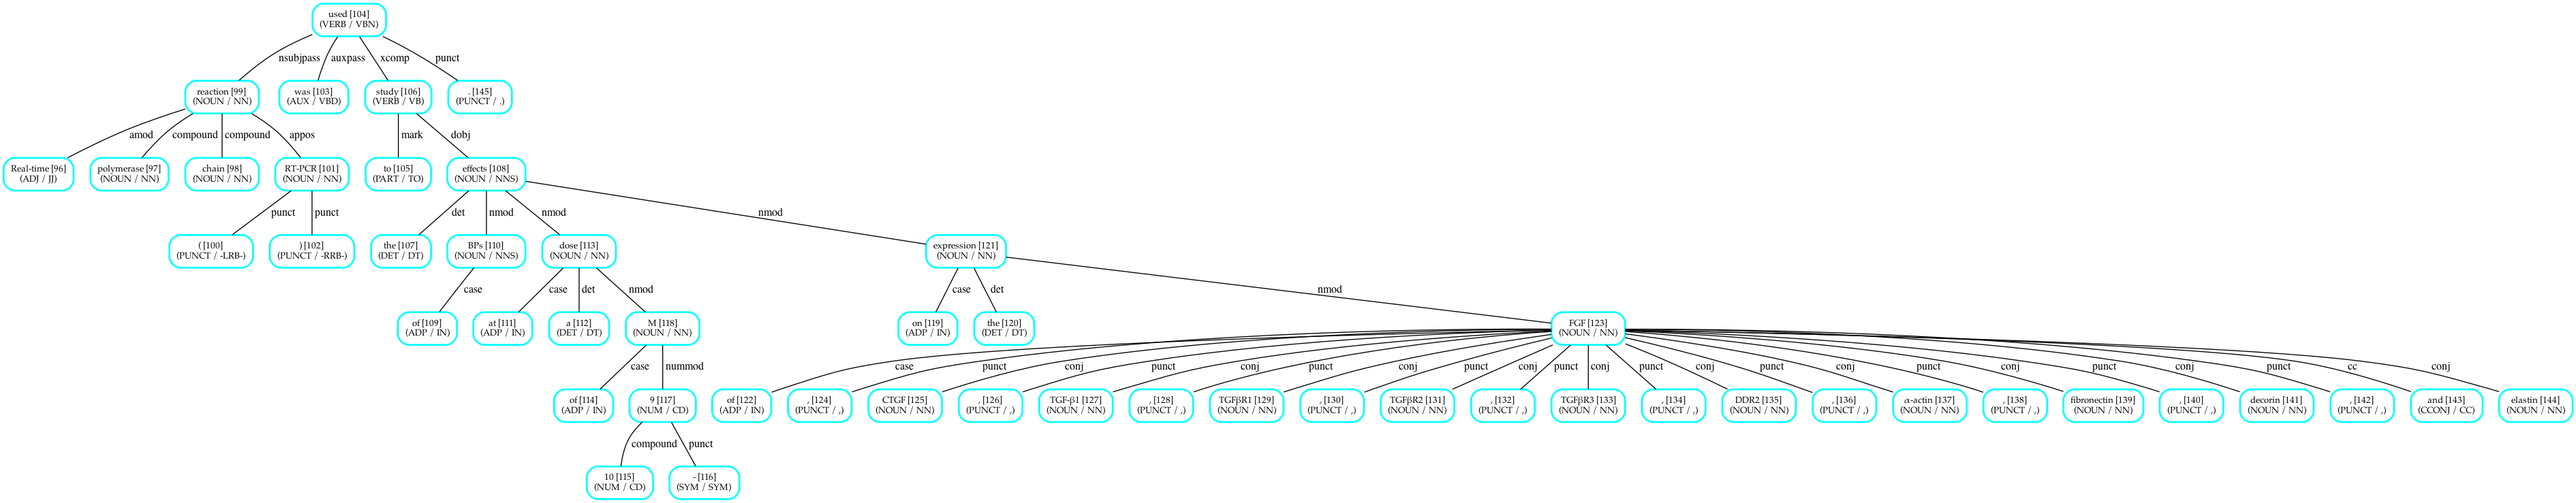

In [97]:
from scify.vis import tree_vis
tree_vis(sent)

In [94]:
from scify.consts import labels
for label in labels:
    nlp.vocab.strings.add(label)

In [259]:
#Doc.set_extension("annotated", default=False, force=False)
#Token.set_extension('annotated', default=[], force=False)
#corp[2].ents[1].set_extension('annotated', default=False, force=False)

In [278]:
def get_label_candidates_from_entity(ent: Span)->List:
    """aggregates labels from possibly multiple NER models (bc5, bionlpa...)"""
    return [cand["label"] for cand in ent._.annotated]

In [283]:
from scify.nlp import rgetattr, rsetattr
[get_label_candidates_from_entity(ent) for ent in corp[8].ents if len(ent._.annotated)]

[['MULTI-TISSUE_STRUCTURE'],
 ['ORGANISM'],
 ['ORGANISM'],
 ['ORGANISM'],
 ['DISEASE'],
 ['ORGANISM'],
 ['DISEASE'],
 ['TISSUE'],
 ['PATHOLOGICAL_FORMATION'],
 ['ORGANISM'],
 ['DISEASE'],
 ['ORGANISM'],
 ['DISEASE'],
 ['DISEASE'],
 ['TISSUE'],
 ['ORGANISM'],
 ['DISEASE'],
 ['MULTI-TISSUE_STRUCTURE'],
 ['ORGANISM']]

In [ ]:
from itertools import product

[* product(["Yolo", "Fredo", "checko"], ["fatty", "fagg"])]
tokens_lookup = {tok.text:tok for tok in doc}

In [285]:
from scify.networks import get_edges
from scify.nlp import *

In [123]:
import networkx as nx

from scify.networks import get_edges
from networkx.drawing.nx_agraph import graphviz_layout, 
import matplotlib.pyplot as plt

In [298]:
#doc[14].ent_iob
visualise_doc(doc, compact=True)

In [311]:
[token for token in doc][2]

bulbar muscular atrophy

In [317]:
doc2 = nlp("Alzheimer causes Schniedelbreak")
visualise_doc(doc2)

In [325]:
show_tabs(doc2)
[* doc2[1].children, *doc2[1].subtree]

token           lemma           POS    Tag    DEP    shape    is_alpha    is_stop
--------------  --------------  -----  -----  -----  -------  ----------  ---------
Alzheimer       alzheimer       NOUN   NN     nsubj  Xxxxx    True        False
causes          cause           VERB   VBZ    ROOT   xxxx     True        False
Schniedelbreak  Schniedelbreak  PROPN  NNP    dobj   Xxxxx    True        False


[Alzheimer, Schniedelbreak, Alzheimer, causes, Schniedelbreak]

In [318]:
get_sdp_path(doc2,0,2)

[Alzheimer, causes, Schniedelbreak]

In [314]:
from scify.networks import get_sdp_path

In [315]:
get_sdp_path(doc, 2, 16, )

[bulbar muscular atrophy,
 motor neuron disease,
 caused,
 expansion,
 polyglutamine tract]

In [313]:
nx.shortest_path(G, doc[2], doc[16])#[0]._.annotated

[bulbar muscular atrophy,
 motor neuron disease,
 caused,
 expansion,
 polyglutamine tract]

In [22]:
def get_ent_from_token(token, doc):
    return [ent for ent in doc.ents if ent.start_char <= token.idx <= ent.end_char]

In [326]:
#valid pattern
construct_pattern('|appos|START_ENTITY sensitivity|nmod|END_ENTITY') or []

[]

In [328]:
#invalid pattern
construct_pattern('causes|nsubj|END_ENTITY causes|dobj|START_ENTITY')

[{'SPEC': {'NODE_NAME': 'causes'}, 'PATTERN': {'LEMMA': 'cause'}},
 {'SPEC': {'NODE_NAME': 'END_ENTITY',
   'NBOR_RELOP': '>',
   'NBOR_NAME': 'causes'},
  'PATTERN': {'DEP': 'nsubj', 'POS': 'NOUN'}},
 {'SPEC': {'NODE_NAME': 'START_ENTITY',
   'NBOR_RELOP': '>',
   'NBOR_NAME': 'causes'},
  'PATTERN': {'DEP': 'dobj', 'POS': 'NOUN'}}]

In [ ]:
from scify.networks import get_edges

In [ ]:
def get_shortest_dep_path(ent_a, ent_b, doc:Doc, graph=False):
    if not graph:
        G = nx.Graph(get_edges(doc))
    

    #networkx

def pattern_from_shortest_dep_path():
    5
    
def extract_pattern_between_entities(doc, ent_a, ent_b):
    4
    
